<a href="https://colab.research.google.com/github/kirtika45/ML-AI/blob/main/SupportVectorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression

### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importing the dataset

In [4]:
dataset = pd.read_excel('accenture_salary_dataset.xlsx')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(dataset)

                Position  Grade   Salary
0          New Associate      1    17000
1              Associate      2    27000
2                Analyst      3    40000
3         Senior Analyst      4    65000
4              Team Lead      5   100000
5      Associate Manager      6   150000
6                Manager      7   250000
7         Senior Manager      8   400000
8             Leadership      9   650000
9      Senior Leadership     10  1000000
10     Global Leadership     12  1800000
11  Executive Leadership     13  4000000


In [5]:
print(X)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [12]
 [13]]


In [6]:
print(y)

[  17000   27000   40000   65000  100000  150000  250000  400000  650000
 1000000 1800000 4000000]


Feature Scaling

In [7]:
y = y.reshape(len(y),1)

In [10]:
print(y)

[[  17000]
 [  27000]
 [  40000]
 [  65000]
 [ 100000]
 [ 150000]
 [ 250000]
 [ 400000]
 [ 650000]
 [1000000]
 [1800000]
 [4000000]]


Training the SVR model on the entire dataset

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [9]:
print(X)

[[-1.52973232]
 [-1.25977956]
 [-0.9898268 ]
 [-0.71987403]
 [-0.44992127]
 [-0.17996851]
 [ 0.08998425]
 [ 0.35993702]
 [ 0.62988978]
 [ 0.89984254]
 [ 1.43974807]
 [ 1.70970083]]


In [10]:
print(y)

[[-0.62024154]
 [-0.61126879]
 [-0.59960421]
 [-0.57717233]
 [-0.54576769]
 [-0.50090393]
 [-0.4111764 ]
 [-0.27658511]
 [-0.05226629]
 [ 0.26178007]
 [ 0.9796003 ]
 [ 2.95360593]]


In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting a new result

In [12]:
regressor.predict(sc_X.transform([[6.5]]))

array([-0.36788056])

In [13]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[298252.57347613]])

Visualizing the SVR data

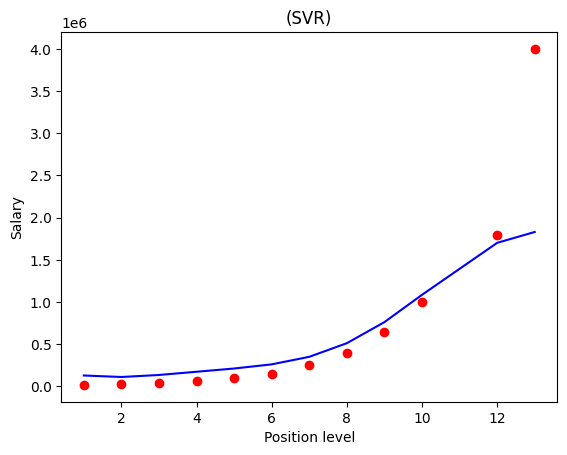

In [14]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('(SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Polynomial reg on the whole dataset

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly, y)

LinearRegression()

Polynomial Visualization in this scenario

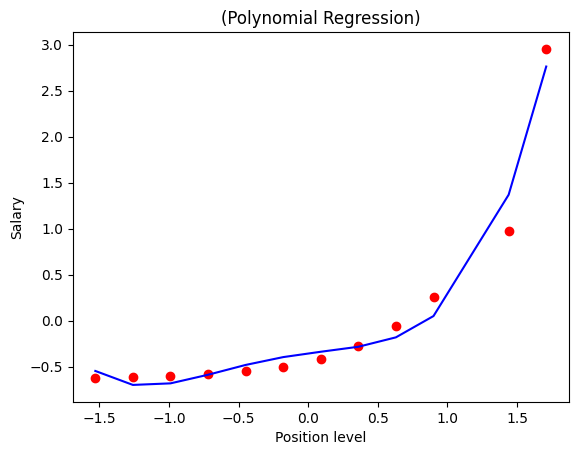

In [19]:
plt.scatter(X,y, color = 'red')
plt.plot(X,regressor.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('(Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [23]:
regressor.predict(poly_reg.fit_transform([[0.6]]))

array([[-0.19609505]])

In [24]:
sc_y.inverse_transform(regressor.predict(poly_reg.fit_transform([[0.6]])))

array([[489704.97304554]])